Problematic: This model Solve a Classification Problem That helps us to classify people with heart disease or not

# 1. Business and Data understanding

## 1.1. data and libraries importation

In [1]:
#from google.colab import files
#data=files.upload()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import classification_report


## 1.2. Data understanding

In [3]:
data = pd.read_csv('heart.csv', encoding='latin', low_memory=False)
df = pd.DataFrame(data)
print(df.columns)
print(df.head())
print(df.info())
print('the number of null values is :')
print(data.isnull().sum())
print('the number of duplicated value is :')
print(data.duplicated().sum())


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pan



---



*   There are 12 features and 918 samples.
*   features are shown with different types
*   **As shown above there are neither null values nor duplications in our database.**





## 1.3. Analyzing age feature and transform it into categories

In [4]:
print("the max of Ages in our Data")
print(df['Age'].max())
print("The minimum of Ages in our Data")
print(df['Age'].min())

the max of Ages in our Data
77
The minimum of Ages in our Data
28




---

*   We can transform discret values of age feature into intervals .So we divide it in some categories in order to facilitate analyzing and interpretations for later





In [5]:
bins = [ 20, 30, 40, 50, 60, 70, df['Age'].max()]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.drop(columns=['Age'], inplace=True)
print(df.head())


  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   M           ATA        140          289          0     Normal    172   
1   F           NAP        160          180          0     Normal    156   
2   M           ATA        130          283          0         ST     98   
3   F           ASY        138          214          0     Normal    108   
4   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease AgeGroup  
0              N      0.0       Up             0    41-50  
1              N      1.0     Flat             1    41-50  
2              N      0.0       Up             0    31-40  
3              Y      1.5     Flat             1    41-50  
4              N      0.0       Up             0    51-60  




---
Now we will see the values present in our data and their frequencies


## 1.4. Features analysis

In [6]:

for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Column: RestingBP
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

Column: Cholesterol
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

Column: FastingBS
FastingBS
0    704
1    214
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Column: MaxHR
MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Column: Oldpeak
Oldpeak
 0



---


*   From the results represented above ,  we can conclude that it is better to use categories instead of discret values.


In [7]:
print("the max of Old Peak in our Data")
print(df['Oldpeak'].max())
print("The minimum of Old Peak in our Data")
print(df['Oldpeak'].min())

the max of Old Peak in our Data
6.2
The minimum of Old Peak in our Data
-2.6


# 2. Data Visualization

## 2.1. Target visualization and analysis

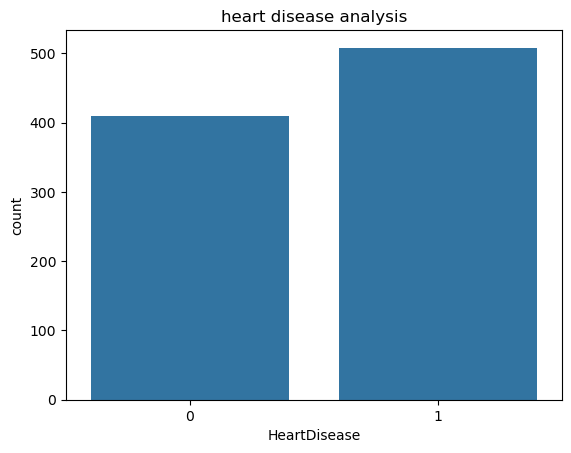

In [8]:
sns.countplot(x='HeartDisease', data=df)
plt.title("heart disease analysis")
plt.show()



---

So, as we can see from this visualization, our dataset is almost **balanced**; the number of cases with heart disease and without it are **nearly equal**.

## 2.2. Sex feature visualization and analysis

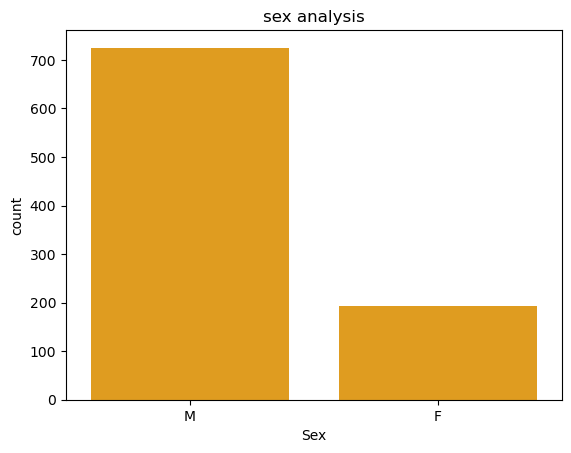

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sex', data=df,color="orange")
plt.title("sex analysis")
plt.show()

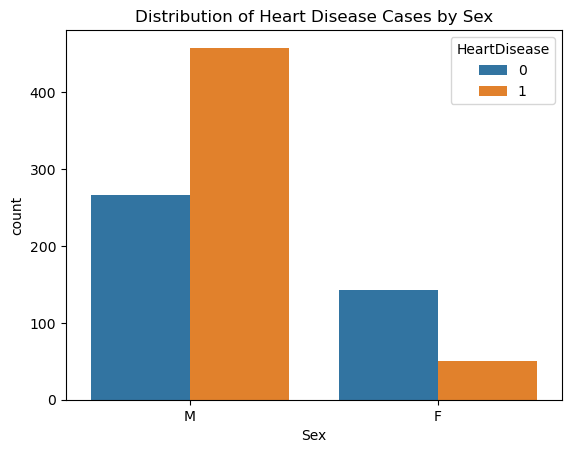

In [10]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Distribution of Heart Disease Cases by Sex')
plt.show()



---


*   The results are clearly show that number of males is bigger than females.

*   we can notice that the odds of having heart disease is bigger than women do.




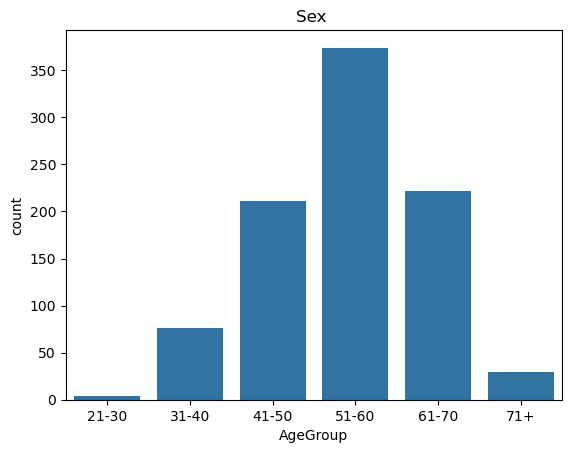

In [11]:
sns.countplot(x='AgeGroup', data=df)
plt.title("Sex ")
plt.show()



---
So, from this visualization, we can conclude that our data is not balanced in terms of sex; we have more men than women. Additionally, from the second visualization, we can see that the probability of a man having heart disease is higher than that of a woman.

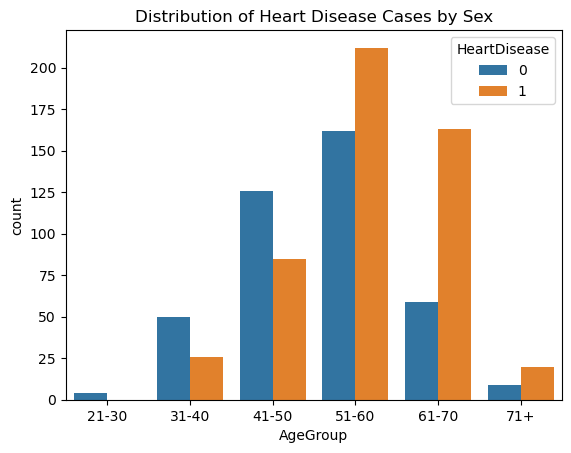

In [12]:
sns.countplot(x='AgeGroup', hue='HeartDisease', data=df)
plt.title('Distribution of Heart Disease Cases by Sex')
plt.show()



---
So, from this visualization, we can see that as age **increases**, the probability of having heart disease also **increases**


# 3. Data preprocessing

## 3.1. Data enconding

In [13]:
labelEncoder=LabelEncoder()
print(df.head())
df.iloc[:,0]=labelEncoder.fit_transform(df.iloc[:,0])
df.iloc[:,1]=labelEncoder.fit_transform(df.iloc[:,1])
df.iloc[:,5]=labelEncoder.fit_transform(df.iloc[:,5])
df.iloc[:,7]=labelEncoder.fit_transform(df.iloc[:,7])
df.iloc[:,9]=labelEncoder.fit_transform(df.iloc[:,9])
df.iloc[:,11]=labelEncoder.fit_transform(df.iloc[:,11])
print(df.head())


  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   M           ATA        140          289          0     Normal    172   
1   F           NAP        160          180          0     Normal    156   
2   M           ATA        130          283          0         ST     98   
3   F           ASY        138          214          0     Normal    108   
4   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease AgeGroup  
0              N      0.0       Up             0    41-50  
1              N      1.0     Flat             1    41-50  
2              N      0.0       Up             0    31-40  
3              Y      1.5     Flat             1    41-50  
4              N      0.0       Up             0    51-60  
  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   1             1        140          289          0          1    172   
1   0             2        160 



---
We transform categorical values into numerical for further treatments.


## 3.2. Feature Scaling

In [14]:
standard_scaler = StandardScaler()
agegroup = df["AgeGroup"]
heartdisease= df["HeartDisease"]
df.drop(columns=['AgeGroup', 'HeartDisease'], inplace=True)
scaled_data = standard_scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
print(df_scaled.head())
df_scaled["HeartDisease"]=heartdisease
df_scaled["AgeGroup"]=agegroup
print(df_scaled)


        Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  0.515952       0.229032   0.410909     0.825070  -0.551341    0.017255   
1 -1.938163       1.275059   1.491752    -0.171961  -0.551341    0.017255   
2  0.515952       0.229032  -0.129513     0.770188  -0.551341    1.601219   
3 -1.938163      -0.816995   0.302825     0.139040  -0.551341    0.017255   
4  0.515952       1.275059   0.951331    -0.034755  -0.551341    0.017255   

      MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0  1.382928       -0.823556 -0.832432  1.052114  
1  0.754157       -0.823556  0.105664 -0.596078  
2 -1.525138       -0.823556 -0.832432  1.052114  
3 -1.132156        1.214246  0.574711 -0.596078  
4 -0.581981       -0.823556 -0.832432  1.052114  
          Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.515952       0.229032   0.410909     0.825070  -0.551341    0.017255   
1   -1.938163       1.275059   1.491752    -0.171961  -0.551341    0.017255   




---
**We tried to scale our data in order to approach values with each other . Thus , it will facilitate the work while training the model**


## 3.3. Data Partionning

In [15]:
X=df_scaled.drop("HeartDisease",axis=1)
Target=df_scaled["HeartDisease"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Target,test_size=0.33)

# 4. Machine Learning

## 4.1. Knn Model

---

K-Nearest Neighbors (KNN) is a simple and versatile supervised machine learning algorithm used for classification and regression tasks.
In KNN, the prediction of a new data point is based on the majority class or the average value of its 'k' nearest neighbors in the feature space.


### 4.1.1. with k = 5

In [16]:
KNN5=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
KNN5.fit(X_train,Y_train)
y_predict_knn=KNN5.predict(X_test)

### 4.1.2. with k = 3

In [17]:
KNN5=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
KNN5.fit(X_train,Y_train)
y_predict_knn=KNN5.predict(X_test)

### 4.1.3. with k = 7

In [18]:
KNN5=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
KNN5.fit(X_train,Y_train)
y_predict_knn=KNN5.predict(X_test)

## 4.2. Multi Layer Perceptron


---
A Multi-Layer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of nodes (neurons) arranged in a feedforward manner. It is one of the most common and versatile architectures used in deep learning for supervised learning tasks, such as classification and regression.


In [19]:
mlp=MLPClassifier(activation='relu',max_iter=1000,hidden_layer_sizes=(8,8),solver='adam')
mlp.fit(X_train,Y_train)
y_predict_mlp=mlp.predict(X_test)

## 4.3. SVM


---

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. SVM is particularly well-suited for classification tasks in which the data can be separated into distinct classes by finding the hyperplane that maximizes the margin between classes.


### 4.3.1. Choosing the best parameters for svm model

In [20]:
model=SVC()
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','poly','sigmoid']
            }
grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train,Y_train)
print('best parameters are ',grid.best_params_)
print('best predictor for svm is  : ',grid.best_estimator_)

best parameters are  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
best predictor for svm is  :  SVC(C=1, gamma=0.01)




---
As shown above , best parameters when using


*   c = 10
*   gamma = 0.01
*   kernel = rbf






## 4.3.2. SVM model cretaion with best paremeters

In [21]:
SVM_model=SVC(C=10, gamma=0.01, kernel='rbf')
SVM_model.fit(X_train,Y_train)
y_predict_svm=SVM_model.predict(X_test)

## 4.4. Random Forest Tree


---
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It improves the performance of decision trees by reducing overfitting and increasing accuracy.


In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
y_predict_rf = rf_classifier.predict(X_test)

## 4.5. Decision Tree Classifier


---


Decision Tree is a simple and interpretable classification algorithm that partitions the feature space into a hierarchy of nested if-else statements based on the values of input features. Each internal node represents a decision based on a feature, and each leaf node represents the class label.

In [23]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
y_predict_dt = dt_classifier.predict(X_test)

# 5. Coross validation treatment with cv = 4
-- > It's important to perform cross validation for obtaining best suitable parameters for each model

## 5.1. print f1 score and make the evaluation of each model




In [24]:


knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'metric': ['euclidean', 'manhattan']}
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'activation': ['relu', 'tanh'],
                  'solver': ['adam'],
                  'alpha': [0.0001, 0.001, 0.01]}
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20]}
dt_param_grid = {'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier(max_iter=100)
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()


knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=4)
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, cv=4)
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=4)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=4)
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=4)


knn_grid_search.fit(X_train, Y_train)
mlp_grid_search.fit(X_train, Y_train)
svm_grid_search.fit(X_train, Y_train)
rf_grid_search.fit(X_train, Y_train)
dt_grid_search.fit(X_train, Y_train)

print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)
print("MLP Best Parameters:", mlp_grid_search.best_params_)
print("MLP Best Score:", mlp_grid_search.best_score_)
print("SVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\U

KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
KNN Best Score: 0.8666921313980137
MLP Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
MLP Best Score: 0.8455245734657499
SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Best Score: 0.8520286902639844
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 50}
Random Forest Best Score: 0.8634029369323487
Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Best Score: 0.8292695866225278




---
## Results analysis and evaluation
### KNN best parameters
*   metrics = manhattan
*   n_neighbirs = 5
### KNN best score
*   0.891053391053391

---

### MLP best parameters
*   Activation = relu
*   alpha = 0.0001
*   hidden_layer_sizes = (50,50)
*   solver = adam


### MLP best score
*   0.8926767676767676

---

### SVM best parameters
*   c = 1
*   kernel = rbf


### SVM best score
*   0.8894194041252864

---

### Random forest best parameters
*   max_depth = none
*   n_estimators = 200


### Random forest best score
*   0.8943001443001443

---

### Decision tree best parameters
*   max_depth = 10
*   min_samples_split = 10


### Random forest best score
*   0.8585858585858586


## 5.2. recreation of each model using the best parameters

In [25]:
from sklearn.metrics import confusion_matrix

knn_best = KNeighborsClassifier(**knn_grid_search.best_params_)
mlp_best = MLPClassifier(**mlp_grid_search.best_params_)
svm_best = SVC(**svm_grid_search.best_params_)
rf_best = RandomForestClassifier(**rf_grid_search.best_params_)
dt_best = DecisionTreeClassifier(**dt_grid_search.best_params_)


knn_best.fit(X_train, Y_train)
mlp_best.fit(X_train, Y_train)
svm_best.fit(X_train, Y_train)
rf_best.fit(X_train, Y_train)
dt_best.fit(X_train, Y_train)


y_pred_knn = knn_best.predict(X_test)
y_pred_mlp = mlp_best.predict(X_test)
y_pred_svm = svm_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)
y_pred_dt = dt_best.predict(X_test)

conf_matrix_knn = confusion_matrix(Y_test, y_pred_knn)
conf_matrix_mlp = confusion_matrix(Y_test, y_pred_mlp)
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)


print("Confusion Matrix for KNN:")
print(conf_matrix_knn)
print("\nConfusion Matrix for MLP:")
print(conf_matrix_mlp)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)
print("\nConfusion Matrix for Random Forest:")
print(conf_matrix_rf)
print("\nConfusion Matrix for Decision Tree:")
print(conf_matrix_dt)


Confusion Matrix for KNN:
[[113  21]
 [ 16 153]]

Confusion Matrix for MLP:
[[111  23]
 [ 21 148]]

Confusion Matrix for SVM:
[[112  22]
 [ 17 152]]

Confusion Matrix for Random Forest:
[[114  20]
 [ 18 151]]

Confusion Matrix for Decision Tree:
[[115  19]
 [ 30 139]]


c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 6. Classification report

In [26]:
print("************** Perfomance of KNN ******************")
print(classification_report(Y_test,y_pred_knn))
print("************** Perfomance of Multi layer perceptron ******************")
print(classification_report(Y_test,y_pred_mlp))
print("************** Perfomance of SVM ******************")
print(classification_report(Y_test,y_pred_svm))
print("************** Perfomance of Random Forest ******************")
print(classification_report(Y_test,y_pred_rf))
print("************** Perfomance of Decision Tree ******************")
print(classification_report(Y_test,y_predict_dt))

************** Perfomance of KNN ******************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       134
           1       0.88      0.91      0.89       169

    accuracy                           0.88       303
   macro avg       0.88      0.87      0.88       303
weighted avg       0.88      0.88      0.88       303

************** Perfomance of Multi layer perceptron ******************
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       134
           1       0.87      0.88      0.87       169

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303

************** Perfomance of SVM ******************
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       134
           1       0.87      0.90      0.89       169

    acc

# 7. deployment

In [27]:
pickle.dump(knn_best,open('best_model.pickle',"wb"))